# Timing for basic Digital Circuits

In this notebook, we will show how to view the timing diagram for the simple scalar function digital circuit that we have simulated.  Before running the notebook, you should complete the steps for [running the simulation](https://sdrangan.github.io/hwdesign/units/basic_logic/sim.md).

## Parsing the VCD File

Running the simulation, will create a [**Value Change Dump**](https://en.wikipedia.org/wiki/Value_change_dump)  or **VCD** file with the values for all the signals in the device under test and the testbench.  To read this file, we import the `vcdvcd` package and read the VCD file with the following code.  

In [1]:
from vcdvcd import VCDVCD
import matplotlib.pyplot as plt

In [14]:
# Parse the VCD file
import os
fn = os.path.join(os.getcwd(), "sim", "dump.vcd")
vcd = VCDVCD(fn, signals=None, store_tvs=True)

# Print the signals
for s in vcd.signals:
    print(s)

tb_simp_fun.clk
tb_simp_fun.rst
tb_simp_fun.a_in[7:0]
tb_simp_fun.b_in[7:0]
tb_simp_fun.c_out[7:0]
tb_simp_fun.dut.clk
tb_simp_fun.dut.rst
tb_simp_fun.dut.a_in[7:0]
tb_simp_fun.dut.b_in[7:0]
tb_simp_fun.dut.c_out[7:0]
tb_simp_fun.dut.a_reg[7:0]
tb_simp_fun.dut.b_reg[7:0]


We see that the simulation generated a number of signals in both the testbench and the device under test.  Most of these are duplicates, so we will just look at the signals corresponding to the clock, inputs and outputs at the top level.  To parse these signals from the VCD file, I have created a simple utility class, `VCDParser` in `xilinxutils`.  The following code instantiates the parser and then extract the top level signals.

In [17]:
import importlib
import xilinxutils
import xilinxutils.vcd
import xilinxutils.timing
importlib.reload(xilinxutils)
importlib.reload(xilinxutils.vcd)
importlib.reload(xilinxutils.timing)
from xilinxutils.vcd import VcdParser
from xilinxutils.timing import TimingDiagram

In [18]:
# Create a parsing class
vp = VcdParser(vcd)

# Get the names of the signals to parse
prefix = 'tb_simp_fun'
signals = [
    'clk',
    'a_in',
    'b_in',
    'c_out'
]

# For each signal, find it in the VCD and add it to the parser
for sig in signals:
    name = f'{prefix}.{sig}'
    found = False
    for s in vcd.signals:
        if name in s:
            vp.add_signal(s, short_name=sig)
            print(f"Added signal: {s}")
            found = True
            break
    if not found:
        print(f"Signal not found: {name}")



Added signal: tb_simp_fun.clk
Added signal: tb_simp_fun.a_in[7:0]
Added signal: tb_simp_fun.b_in[7:0]
Added signal: tb_simp_fun.c_out[7:0]


## Creating a Timing Diagram

We can also visualize the signals in a timing diagram.  For this purpose, I have added a `TimingDiagram` class that can be used as follows.

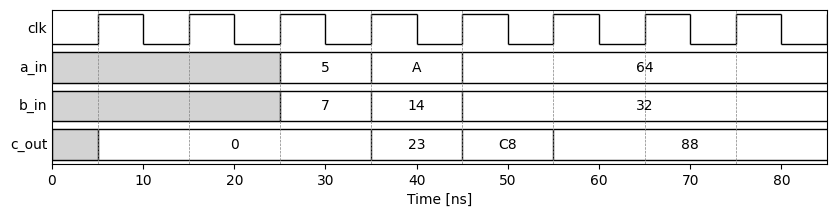

In [20]:
# Get the timing signals
sig_list = vp.get_td_signals()

# Create the timing diagram
td = TimingDiagram()
td.add_signals(sig_list)
trange = None
ax = td.plot_signals(add_clk_grid=True, trange=trange, text_mode='always')
_ = ax.set_xlabel('Time [ns]')